In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('GSPC.csv',parse_dates=['Date'])

In [7]:
df.head()

Date       Open       High        Low      Close  Adj Close  Volume
0 1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0
1 1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0
2 1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0
3 1928-01-05  17.549999  17.549999  17.549999  17.549999  17.549999       0
4 1928-01-06  17.660000  17.660000  17.660000  17.660000  17.660000       0

In [8]:
df.tail()

Date         Open         High          Low        Close  \
23077 2019-11-14  3090.750000  3098.199951  3083.260010  3096.629883   
23078 2019-11-15  3107.919922  3120.459961  3104.600098  3120.459961   
23079 2019-11-18  3117.909912  3124.169922  3112.060059  3122.030029   
23080 2019-11-19  3127.449951  3127.639893  3113.469971  3120.179932   
23081 2019-11-20  3114.659912  3118.969971  3091.409912  3108.459961   

         Adj Close      Volume  
23077  3096.629883  3276070000  
23078  3120.459961  3335650000  
23079  3122.030029  3436690000  
23080  3120.179932  3590070000  
23081  3108.459961  4034890000

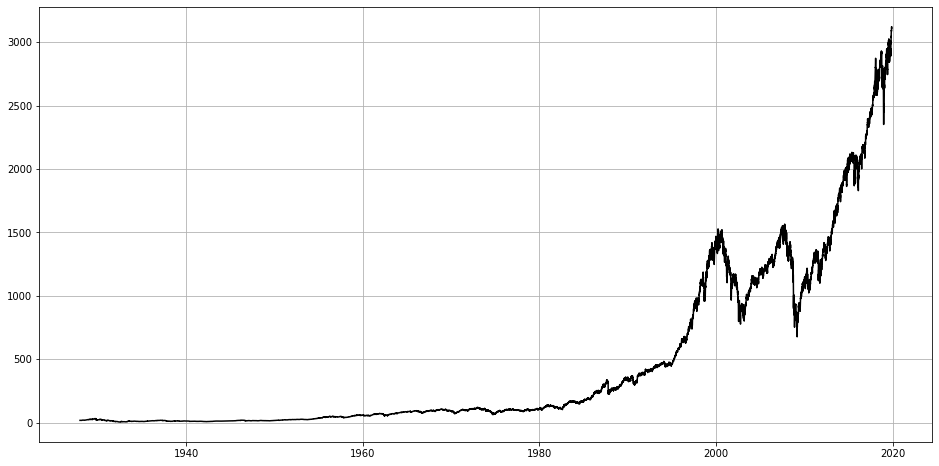

In [11]:
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(df['Date'], df['Adj Close'], c='black')
plt.grid()
plt.show()

In [12]:
final_df = df.copy()

In [14]:
#aggregration frequency
time_grouper = 'Y'

final_df = final_df.set_index('Date')
tmp_open = final_df.groupby(pd.Grouper(freq=time_grouper))['Adj Close'].nth([0])
tmp_close = final_df.groupby(pd.Grouper(freq=time_grouper))['Adj Close'].nth([-1])
final_df = final_df.groupby(pd.Grouper(freq=time_grouper))['Adj Close'].agg({'Low':np.min,'High':np.max}).reset_index()
final_df['Open'] = tmp_open.values
final_df['Close'] = tmp_close.values

final_df = final_df[['Date', 'Open', 'High', 'Low', 'Close']]
final_df.tail()



C:\Users\AC40407\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


Date         Open         High          Low        Close
88 2015-12-31  2058.199951  2130.820068  1867.609985  2043.939941
89 2016-12-31  2012.660034  2271.719971  1829.079956  2238.830078
90 2017-12-31  2257.830078  2690.159912  2257.830078  2673.610107
91 2018-12-31  2695.810059  2930.750000  2351.100098  2506.850098
92 2019-12-31  2510.030029  3122.030029  2447.889893  3108.459961

In [16]:
import matplotlib as mpl
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
mpl.style.use('default')

final_df['Date'] = final_df['Date'].map(mdates.date2num)

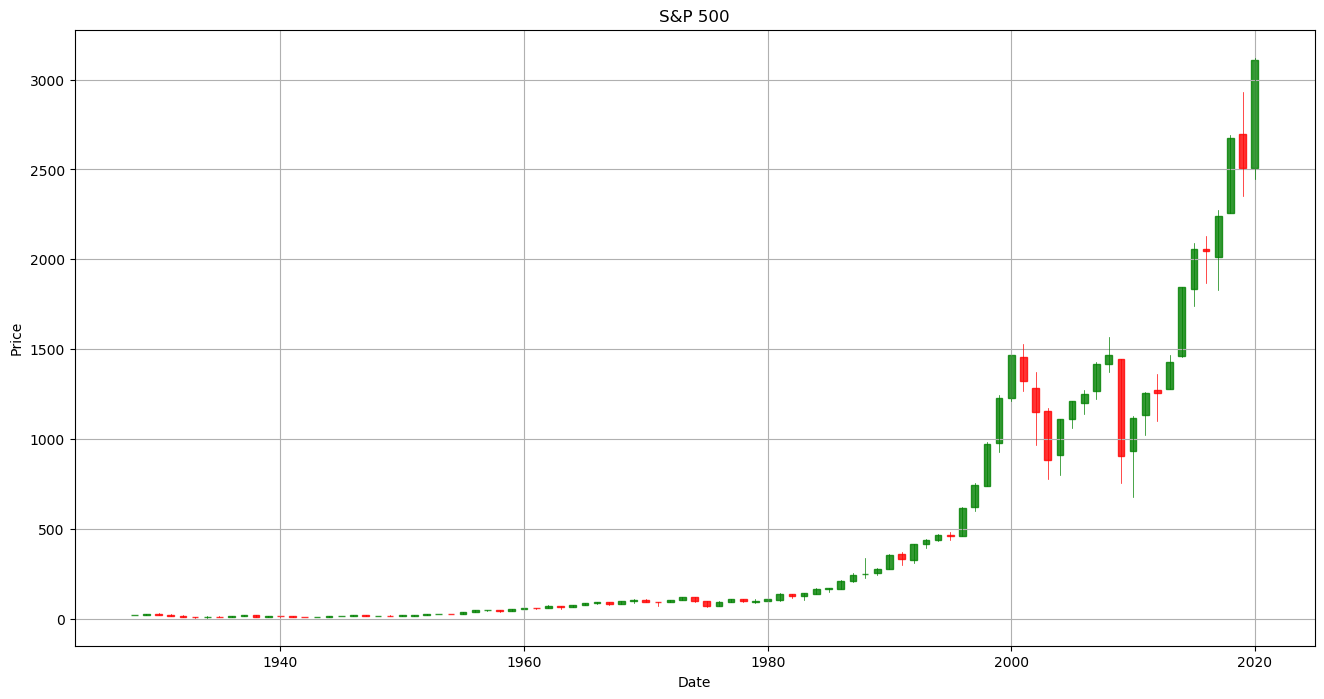

In [22]:
#Making plot

fig,ax = plt.subplots(figsize=(16,8))

#Converts raw mdate numbers to date
ax.xaxis_date()
plt.xlabel('Date')

#Making Candlestick plot
candlestick_ohlc(ax,final_df.values, width=200, colorup='g', colordown='r',alpha=.8)

plt.ylabel('Price')
plt.title('S&P 500')
plt.grid()
plt.show()